# Matplotlib　基本編

対応する動画：[Pythonでグラフ作成　Matplotlib　基本編【研究で使うPython #67】](https://youtu.be/jmqvYiLFjQ4)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

## ライブラリの読み込み

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 目次 
1. Matplotlibを使ってグラフを作成
2. 作ったグラフが他人に理解されやすくなるよう形式を整える

## 基本的なグラフの作り方

### データの用意

- 新型コロナウイルスの感染者データ
- [厚生労働省のオープンデータのページ](https://www.mhlw.go.jp/stf/covid-19/open-data.html)から**○新規陽性者数の推移（日別）**と**○重症者数の推移**というcsv形式の2つのデータをダウンロード

In [9]:
case_df = pd.read_csv('newly_confirmed_cases_daily.csv', index_col=0)   # 新規感染者数のデータ(csv形式)を読み込み
severe_df = pd.read_csv('severe_cases_daily.csv', index_col=0)          # 重傷者数のデータ(csv形式)を読み込み

case_all_df = case_df.loc[:,['ALL']].rename(columns={'ALL':'New_Cases'})          # 全国のデータのみ抽出（名前も変更）
severe_all_df = severe_df.loc[:,['ALL']].rename(columns={'ALL':'Severe_Cases'})   # 重傷者数でも同様に抽出 & 名前変更

merged_all_df = case_all_df.merge(severe_all_df, on=['Date'])                     # 新規感染者数と重傷者数のデータを結合する

In [10]:
merged_all_df

,New_Cases,Severe_Cases
Date,,
2020/5/9,108,267
2020/5/10,66,249
2020/5/11,58,243
2020/5/12,87,259
2020/5/13,55,245
...,...,...
2022/5/12,41657,156
2022/5/13,39582,153
2022/5/14,39339,139


### 折れ線グラフ
`plt.plot(データのリスト or 配列)`でプロットすることが可能

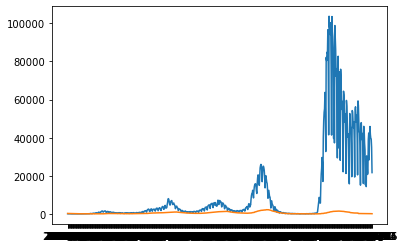

In [11]:
date = merged_all_df.index               # 日付のデータ
case = merged_all_df['New_Cases']        # 新規感染者のデータ
severe = merged_all_df['Severe_Cases']   # 重傷者数のデータ

plt.plot(date, case)     # 新規感染者をプロット（青）
plt.plot(date, severe)   # 重傷者数をプロット（橙）

In [31]:
case

Date
2020/5/9       108
2020/5/10       66
2020/5/11       58
2020/5/12       87
2020/5/13       55
             ...  
2022/5/12    41657
2022/5/13    39582
2022/5/14    39339
2022/5/15    34895
2022/5/16    21676
Name: New_Cases, Length: 738, dtype: int64

### 棒グラフ
`plt.bar(横軸方向の位置を示すデータ, 棒の高さを示すデータ)`でプロットできる．

<BarContainer object of 47 artists>

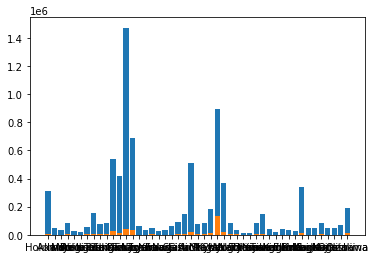

In [12]:
case_pref_df = case_df.loc[:,'Hokkaido':]       # 北海道〜沖縄の各都道府県におけるデータを抽出
severe_pref_df = severe_df.loc[:,'Hokkaido':]   # 上と同じ

prefs = case_pref_df.columns.values   # 都道府県名のラベルを取得
pref_case = case_pref_df.sum()        # 各都道府県において累計新規感染者数を計算
pref_severe = severe_pref_df.sum()    # 同様に累計重傷者数を計算

plt.bar(prefs, pref_case)     # 都道府県別の累計新規感染者数をプロット
plt.bar(prefs, pref_severe)   # 同様に累計重傷者数を計算

In [32]:
case_pref_df

,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,Tochigi,Gunma,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2020/1/16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020/1/17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020/1/18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020/1/19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020/1/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022/5/12,3176,444,276,475,223,205,560,649,408,362,...,241,281,2424,364,481,649,408,536,767,2330
2022/5/13,3034,373,292,494,233,255,498,645,391,360,...,212,266,2198,309,394,582,353,492,633,2242
2022/5/14,2771,353,261,512,202,284,529,641,397,395,...,212,257,2114,308,415,596,358,550,640,2464


### 散布図
`plt.scatter(横軸方向のデータ, 縦軸方向のデータ)`でプロットできる．

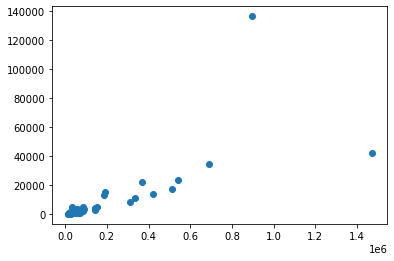

In [13]:
plt.scatter(pref_case, pref_severe)    # 各都道府県における新規感染者数と重傷者数の関係性を散布図で可視化

## 形式を整える

上でやったように，Matplotlibを使うと，手軽に折れ線グラフや棒グラフなど多様なグラフを描画することができる．
このことは実験の結果をすぐ確認しようとするときにはとても便利である．

一方で，グラフを他人に見せて説明しようとする場合，単純に`plt.plot()`や`plt.bar()`を使うだけでは，グラフとして必要な形式を満たすことができない．以下の図を見てもらいたい．

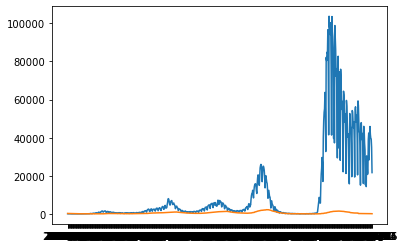

In [14]:
# plt.plot()を使って折れ線グラフを表示

plt.plot(date, case)
plt.plot(date, severe)

これを人が見て理解しやすい形式に整える際，例えば以下の点を改善する必要が出てくる：
* 横軸，縦軸にラベルがないため，それぞれが何を示しているか分からない
* 特に横軸についた目盛りが重なって読めない
* 複数のデータを同時に表すため，色分けした複数の線を使ったが，どの線がどのデータに対応するかパッと見て分からない

基本編では，こういった情報をグラフに含ませるためのやり方を示し，なるべく簡単に最低限の形式を整えられるようになることを目的とする．

なお，以降では折れ線グラフを使って説明するが，棒グラフや散布図でも同様のやり方で形式を整えることは可能である．


**目次**
* [図の大きさを指定する](#図の大きさを指定する)
* [軸ラベルを付ける](#軸ラベルを付ける)
* [軸の目盛りラベルを変える](#軸の目盛りラベルを変える)

### 図の大きさを指定する
横長にしたい場合など，大きさを指定したい場合は`plt.figure(figsize=(width, height))`をあらかじめ記述しておく．

>なお基本の大きさは $6.4\times4.8$ となっている（単位はインチ）．  
>1インチ=2.54cm のため，欲しい幅が`x`cmならば，`x/2.54`を計算すればいい．

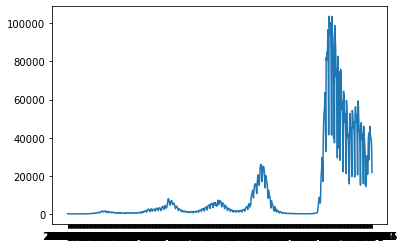

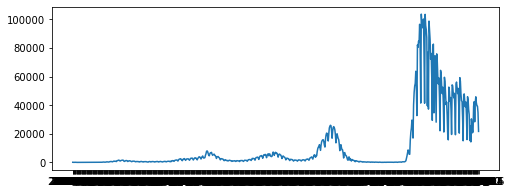

In [16]:
# サイズ指定せず図を書く
plt.plot(case)
plt.show()

# plotの前に次の記述をするとサイズ指定できる
plt.figure(figsize=(8,3))  ## figsize=(横幅, 縦幅) で図のサイズを指定（単位はインチ）
plt.plot(case)
plt.show()

### 軸ラベルを付ける
軸にラベルを付けることで，何を示しているグラフかが明確になる．  
`plt.xlabel(text)` および `plt.ylabel(text)` を使うと横軸と縦軸にラベルを付けられる．

また，`fontsize=12`のようなオプションをつけることでラベルのフォントサイズを指定することも可能（デフォルト値は大抵`10`，環境差あるかも）．

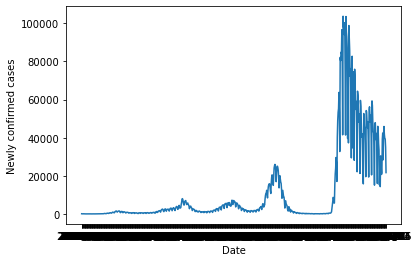

In [17]:
plt.xlabel('Date')       ## 横軸のラベルを指定
plt.ylabel('Newly confirmed cases')  ## 縦軸のラベルを指定

# plt.xlabel('date', fontsize=15)  ## 軸ラベルのフォントサイズを指定できる
# plt.ylabel('Newly confirmed cases', fontsize=15)

plt.plot(case)

### 軸の目盛りラベルを変える
軸の目盛りラベルが視認できると，データの分析が容易になる．

今回は日付が横軸になっているが，全ての日付が表示されているため重なって読めなくなってしまっている．  
この場合，目盛りラベルをもっと減らす必要がある．具体的には「2020/06」，「2020/09」などのように3ヶ月ごとの年と月を表示させるならば見やすくなるはずだ．

→`plt.xticks()`(あるいは`plt.yticks()`)を用いると，目盛りの間隔とラベルの形式を変更できる．

これは `plt.xticks(目盛りラベルを配置する場所のリスト, 目盛りラベルのリスト)` のように使用する(リスト以外の似たような形式にも対応)．

まずはデータの日付がいつからいつまでかを確認しよう．

In [20]:
merged_all_df

,New_Cases,Severe_Cases
Date,,
2020-05-09,108,267
2020-05-10,66,249
2020-05-11,58,243
2020-05-12,87,259
2020-05-13,55,245
...,...,...
2022-05-12,41657,156
2022-05-13,39582,153
2022-05-14,39339,139


2020年5月〜2022年5月までのデータが存在することが分かった．

これをふまえて，2020/06, 2020/09, 2020/12, 2021/03, ... , 2022/03 のように軸の目盛りラベルを設定する．

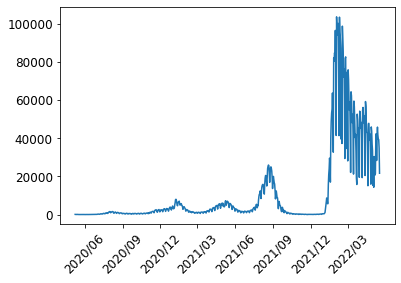

In [22]:
# データ上では日付が文字列になっていたので，年月日に分けられる形式に変更
merged_all_df.index = pd.to_datetime(merged_all_df.index)

# 目盛りラベルを配置するのは，各月の1日に相当する場所とする
tick_index = merged_all_df[pd.DatetimeIndex(merged_all_df.index).day == 1].index

# 目盛りラベルは内包表記を使って自力で生成
tick_labels = [f'2020/{i:02d}' for i in range(6, 12+1)] + \
              [f'2021/{i:02d}' for i in range(1, 12+1)] + \
              [f'2022/{i:02d}' for i in range(1, 5+1)]

"""
# データが今後増えていったとしても自動的にラベル生成できる書き方もある
merged_all_df['Year'] = pd.DatetimeIndex(merged_all_df.index).year
merged_all_df['Month'] = pd.DatetimeIndex(merged_all_df.index).month
merged_all_df['Day'] = pd.DatetimeIndex(merged_all_df.index).day

tick_index = merged_all_df[merged_all_df.Day == 1].index
case_YM_df = merged_all_df.loc[tick_index[0]:,:].groupby(['Year','Month'])['New_Cases'].sum()
tick_labels = case_YM_df.index
"""

# plt.xticks()に，目盛りラベルを配置する場所と目盛りラベル自体を渡す(その他にフォントサイズやラベルの回転角度等も指定できる)
plt.xticks(tick_index[::3], tick_labels[::3], fontsize=12, rotation=45)

# 縦軸の目盛りラベルは大きさ以外特に調整しない
plt.yticks(fontsize=12)

date = merged_all_df.index
plt.plot(date, case)

### それぞれの線に名前を付け，凡例を表示 → `plt.legend()`

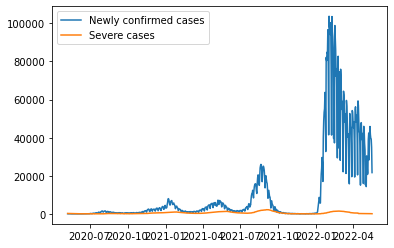

In [23]:
plt.plot(date, case,  label='Newly confirmed cases')
plt.plot(date, severe, label='Severe cases')
plt.legend()

### 線の色，種類，マーカー等を指定する

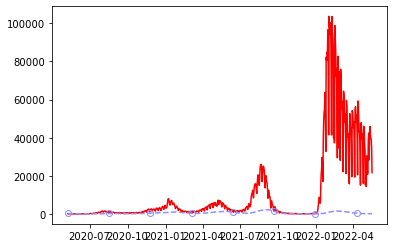

In [24]:
plt.plot(date, case, 
         color='r', ## 赤に設定
         ls='-',      ## 実線
        )
plt.plot(date, severe, 
         color='#9090ff', ## 色はrgb形式でも指定できる（頭に '#' が必要）
         ls='--',     ## 破線
         marker='o', markerfacecolor='None', markevery=100,  ## マーカーを×に，間隔を100ずつに
        )

### グリッド線を引く

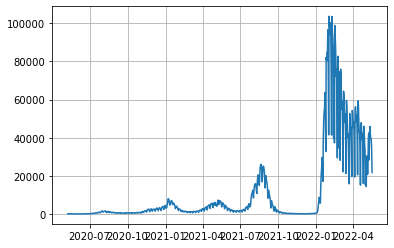

In [25]:
plt.grid()
# plt.grid(color='#bbbbbb', ls='--')    # 折れ線グラフと同様に線の色や種類を指定できる

plt.plot(date, case)

### タイトルを付ける

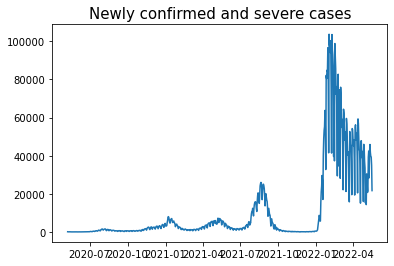

In [26]:
plt.title('Newly confirmed and severe cases', fontsize=15)

plt.plot(date, case)

### 全部まとめて

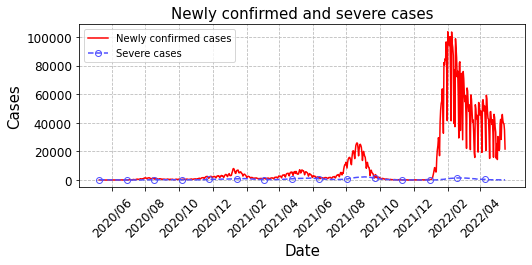

In [28]:
# サイズ指定
plt.figure(figsize=(8,3))

# 軸ラベル指定
plt.xlabel('Date', fontsize=15)
plt.ylabel('Cases', fontsize=15)

# 軸の目盛りラベル指定
plt.xticks(tick_index[::2], tick_labels[::2], fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# 複数の線をプロットし，凡例をつける
plt.plot(date, case,  
         label='Newly confirmed cases', 
         color='r', ls='-')
plt.plot(date, severe, 
         label='Severe cases', 
         color='#5050ff', ls='--', marker='o', markerfacecolor='None', markevery=50)
plt.legend()

# グリッド線を引く
plt.grid(color='#bbbbbb', ls='--')

# タイトル指定
plt.title('Newly confirmed and severe cases', fontsize=15)

# 表示
plt.show()